# TACHE 1

In [109]:
import numpy as np
import matplotlib.pyplot as plt

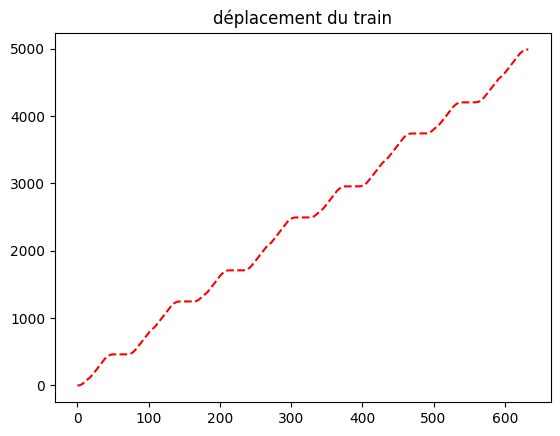

In [110]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('marche.txt')


x = data[:, 0]
y = data[:, 1]
plt.figure()
plt.title("déplacement du train")
plt.plot(x,y,'r--')
plt.show()

- Puissance mécanique a fournir

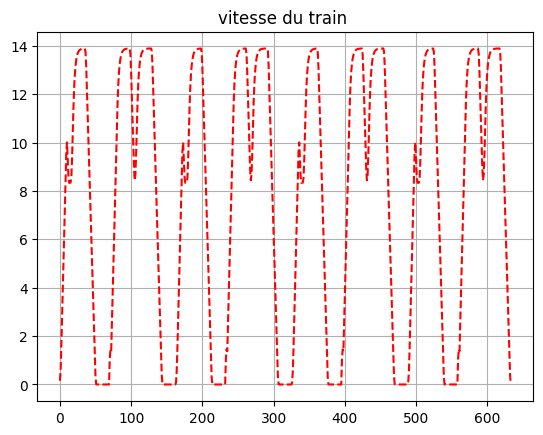

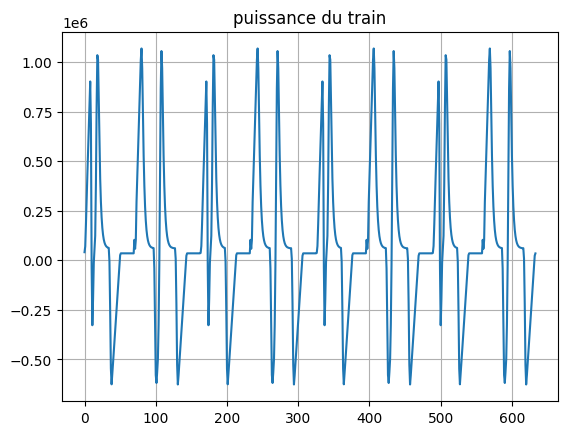

In [111]:
A0,A1=780,6.4/1e3
B0,B1=0,0.14/1e3
C0,C1=0.3634,0
M=70*1e3 #tonnes
V=np.gradient(y, x)
accel=np.gradient(V,x)
rendement=0.8
constante=35e3

plt.figure()
plt.grid()
plt.title("vitesse du train ")
plt.plot(V,'r--')
Fres=(A0+A1*M)+(B0+B1*M)*V+(C0+C1*M)*V**2
Fmot=M*accel+Fres
Pmec=Fmot*V
Pelec = np.where(
    Pmec < 0,  # Condition: if the value is negative
    (Pmec * rendement) + constante,  # Apply this formula
    (Pmec / rendement) + constante   # Else apply this formula
)  #pos / #(neg * +)
plt.figure()
plt.title("puissance du train")
#plt.grid()
#plt.xlim([0,100])
#plt.plot(Pmec,'r')
#plt.figure()
plt.grid()
plt.plot(Pelec)

- Tension du train

In [112]:
import math

Vsst = 790
Rsst = 33 * 1e-3
rho_LAC = 131 * 1e-6
rho_rail = 18 * 1e-6

L = y[-1]

R_LAC1 = rho_LAC * y
R_LAC2 = rho_LAC * (L - y)
R_rail1 = rho_rail * y
R_rail2 = rho_rail * (L - y)

Req1 = Rsst + R_LAC1 + R_rail1
Req2 = Rsst + R_LAC2 + R_rail2
Req_total = Req1*Req2/(Req1+Req2)


(array([], dtype=int64),)


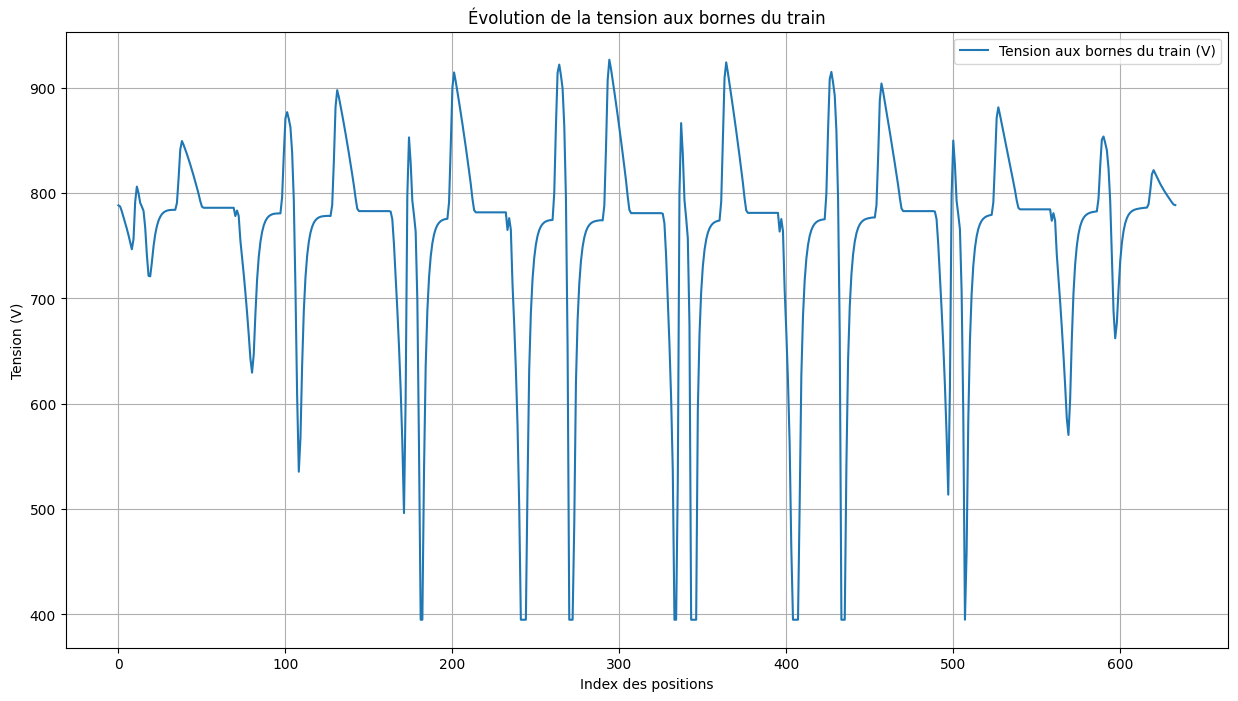

In [113]:
Vtrain = []
for r, p in zip(Req_total, Pelec):
    discriminant = Vsst**2 - 4 * r * p
    if discriminant >= 0:  
        V = 0.5 * (Vsst + math.sqrt(discriminant))
    else:
        V = Vsst/2
    Vtrain.append(V)


Vtrain = np.array(Vtrain)

# Tracé de la courbe
plt.figure(figsize=(15,8))
print(np.where(Vtrain==100))
#plt.xlim(200,500)
#plt.scatter(np.where(Vtrain==100),np.full(4,790),color='red',label='points ou le disriminant est nul')
plt.plot(Vtrain, label="Tension aux bornes du train (V)")
plt.xlabel("Index des positions")
plt.grid()
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension aux bornes du train")
plt.legend()

plt.show()

# courant consommé par le train 


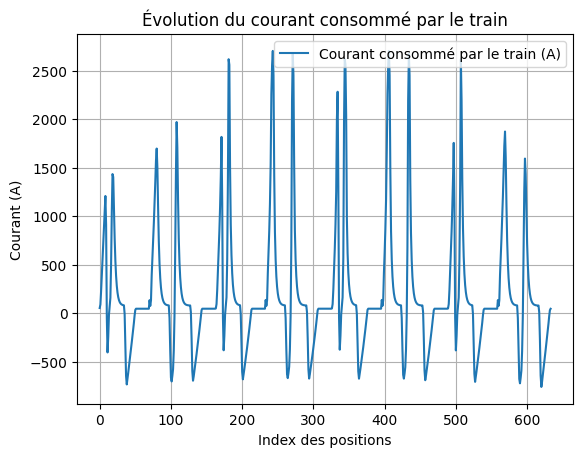

In [114]:
Itrain = Pelec / Vtrain
plt.plot(Itrain, label="Courant consommé par le train (A)")
plt.xlabel("Index des positions")
plt.ylabel("Courant (A)")
plt.title("Évolution du courant consommé par le train")
plt.legend()
plt.grid() 
plt.show()


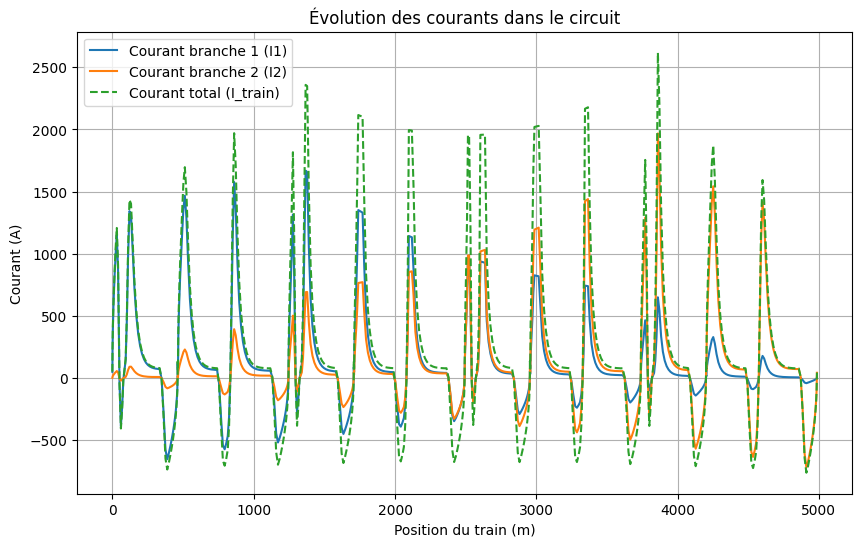

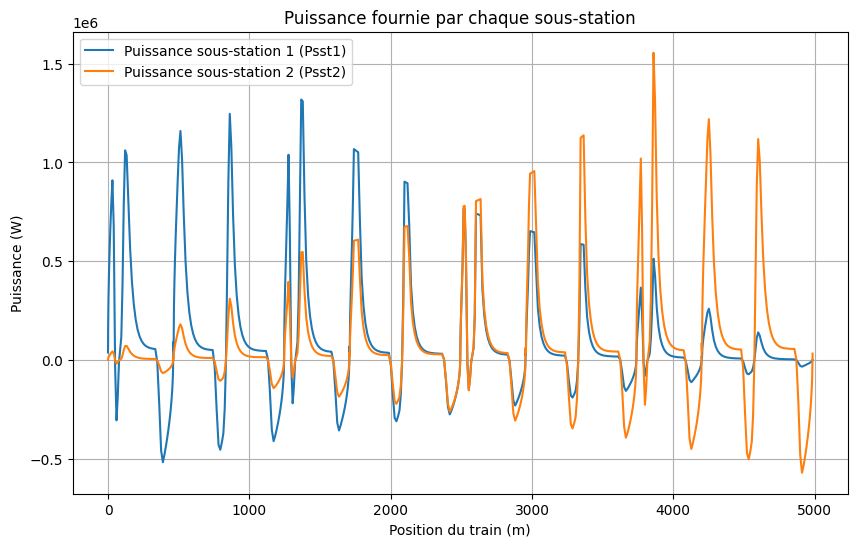

In [115]:


Vsst = 790
Rsst = 33 * 1e-3
rho_LAC = 131 * 1e-6
rho_rail = 18 * 1e-6

L = y[-1]

R_LAC1 = rho_LAC * y
R_LAC2 = rho_LAC * (L - y)
R_rail1 = rho_rail * y
R_rail2 = rho_rail * (L - y)

Req1 = Rsst + R_LAC1 + R_rail1
Req2 = Rsst + R_LAC2 + R_rail2

Req_total = Req1*Req2/(Req1+Req2)

I_train = (Vsst-Vtrain)/ Req_total
I1 = (Vsst-Vtrain) / Req1
I2 = (Vsst-Vtrain) / Req2



Psst1 = Vsst * I1
Psst2 = Vsst * I2

plt.figure(figsize=(10, 6))
plt.plot(y, I1, label="Courant branche 1 (I1)", linewidth=1.5)
plt.plot(y, I2, label="Courant branche 2 (I2)", linewidth=1.5)
plt.plot(y, I_train, label="Courant total (I_train)", linestyle='--', linewidth=1.5)
plt.xlabel("Position du train (m)")
plt.ylabel("Courant (A)")
plt.title("Évolution des courants dans le circuit")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y, Psst1, label="Puissance sous-station 1 (Psst1)", linewidth=1.5)
plt.plot(y, Psst2, label="Puissance sous-station 2 (Psst2)", linewidth=1.5)
plt.xlabel("Position du train (m)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie par chaque sous-station")
plt.legend()
plt.grid()
plt.show()


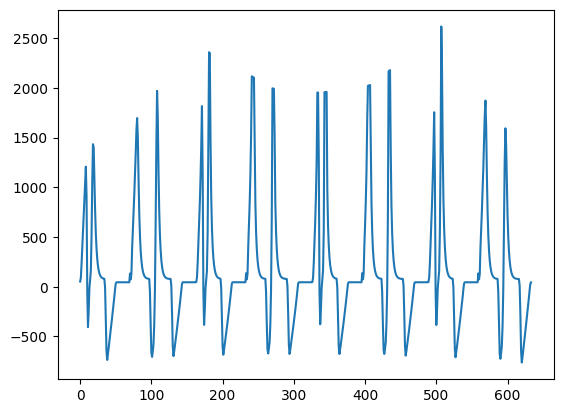

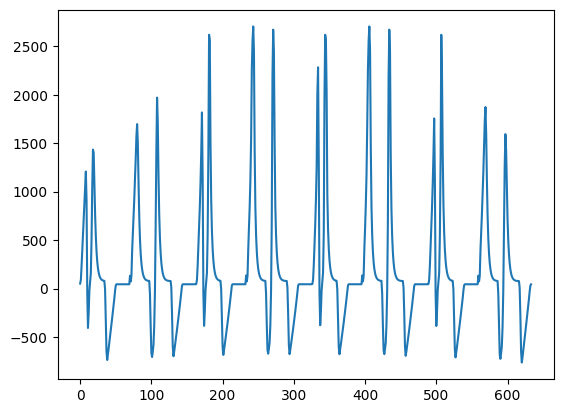

In [120]:
plt.figure()
plt.plot(I1+I2)
plt.figure()
plt.plot(Pelec/Vtrain)
#plt.plot((Vsst-Vtrain)/Req_total)
#plt.figure()
#plt.plot(Itrain)

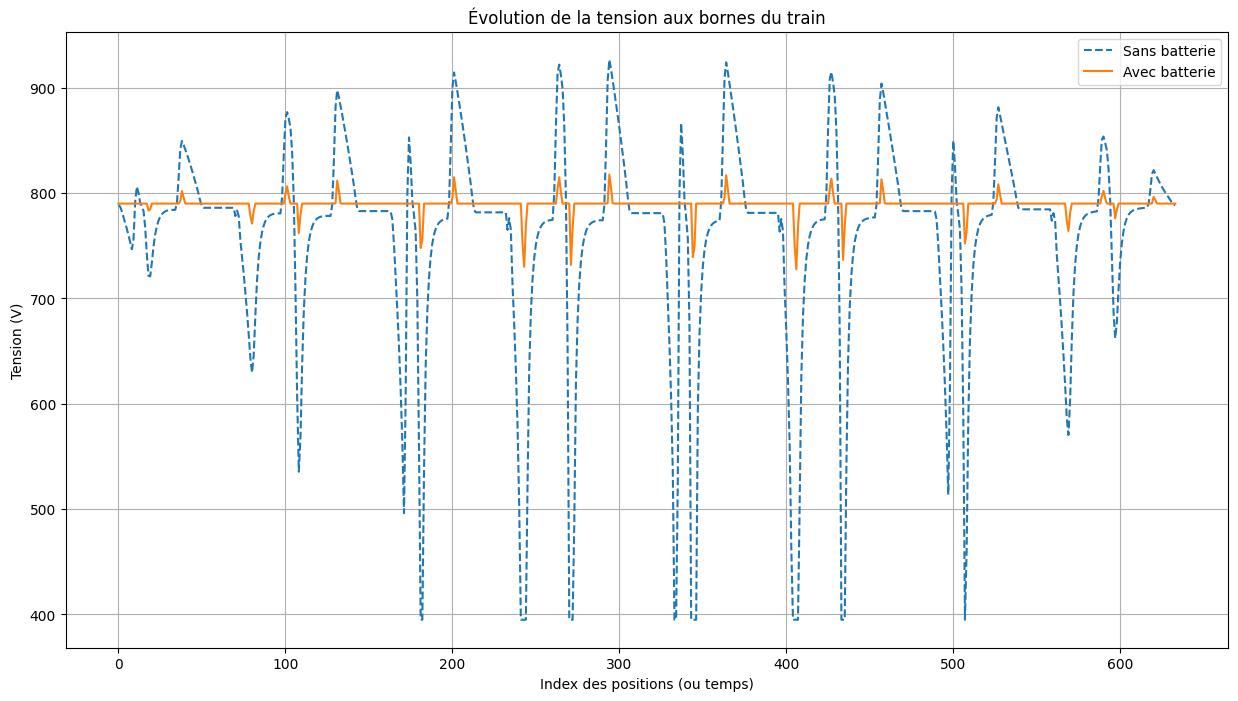

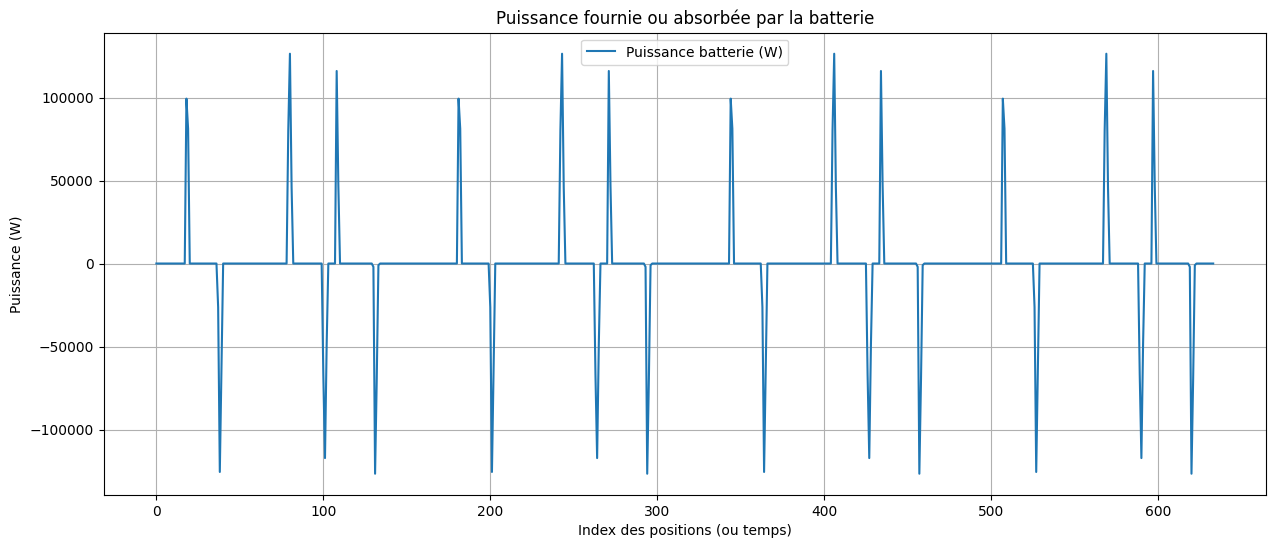

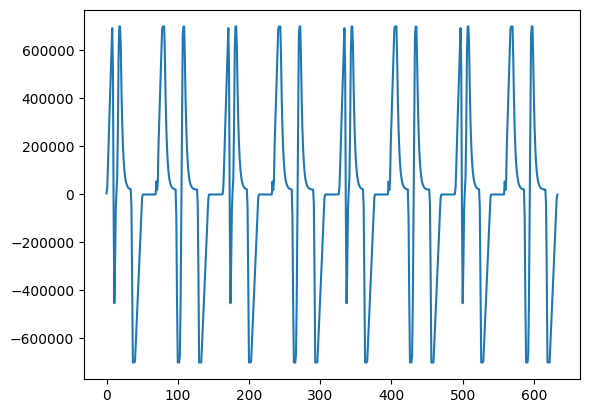

In [126]:

capacite_batterie_kWh = 1000 
capacite_batterie_J = capacite_batterie_kWh * 3.6e6  
etat_charge = capacite_batterie_J 
puissance_max_batterie = 700e3  

P_batt = []
V_train_batt = [] 
p_lacc=[]

for p_train, v_train, r_eq in zip(Pmec, Vtrain, Req_total):
    if p_train < 0:
        
        delta_e_s = min(-p_train, puissance_max_batterie)  
        etat_charge = min(etat_charge + delta_e_s, capacite_batterie_J)
        P_batt.append(-delta_e_s)  
        
    elif p_train > 0:  
        if etat_charge > 0:  
            delta_e_d = min(p_train, puissance_max_batterie, etat_charge) # si p_train > etat charge, on prend etat charge, si p_train<etat charge, on prend p_train
            etat_charge -= delta_e_d
            P_batt.append(delta_e_d)  
        else:
            P_batt.append(0)  
    else:
        P_batt.append(0)  

    # Calcul de la tension avec batterie
    p_lac = p_train - P_batt[-1]
    p_lacc.append(p_lac)
    v_batt = Vsst - r_eq * (p_lac / v_train)
    V_train_batt.append(v_batt)

V_train_batt = np.array(V_train_batt)
P_batt = np.array(P_batt)


plt.figure(figsize=(15, 8))
plt.plot(Vtrain, label="Sans batterie", linestyle="--", linewidth=  1.5)
plt.plot(V_train_batt, label="Avec batterie", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension aux bornes du train")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(p_lacc, label="Puissance batterie (W)", linewidth=1.5)
plt.xlabel("Index des positions (ou temps)")
plt.ylabel("Puissance (W)")
plt.title("Puissance fournie ou absorbée par la batterie")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(P_batt)


In [125]:
p_lacc

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 99337.19290549483,
 81197.51908909506,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -26298.964717857656,
 -125578.63937028311,
 -62497.94822695118,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 80290.7982244906,
 126390.92201617791,
 45867.92745631607,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -66905.21303259279,
 -117209.73903282522,
 -48868.161937380675,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 115983.07724820275,
 47013.86068847298,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1998.955501891789,
 -1266